# PU Learning: Ad clicks
## Binary classification with positive and unlabelled data 

Whether a user will click on an ad can be thought of as a problem in PU learning. I.e. if we monitor the user of a website for some observation period, we will observe many users who do not click on the ad, but this doesn't mean they won't click on it at some unobserved time in the future. We think of the users who have clicked the ad during the observation period as our labeled set, and the ones who haven't as our unlabeled set which consists of both people who never click on the ad, as well as those who do at some unobserved time.

## The ads dataset

For illustration we use the following data set borrowed from Kaggle.com and have already preprocessed it for convenience.



In [1]:
import pandas as pd 
import numpy as np
import sys
import os
_ = os.getcwd()

two_up =  os.path.abspath(os.path.join(_,"../.."))
data_path = os.path.abspath(os.path.join(_,"../../../data"))
sys.path.append(two_up)

data = pd.read_csv(data_path + '\\ads.csv')

data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,11,3,21
996,51.30,45,67782.17,134.42,1,1,4,22,4,2
997,51.63,51,42415.72,120.37,1,1,2,1,0,17
998,55.55,19,41920.79,187.95,0,0,3,24,3,2


## Data Preprocessing

In [2]:
#Relabl: 2="censored" and 1="not cured"

def convert(row):
    if row==0:
        return 2
    return 1

data['Clicked on Ad'] = data['Clicked on Ad'].apply(lambda x:convert(x) ) 

In [3]:
#Test train split
from sklearn.model_selection import train_test_split
training_data, test_data, training_labels, test_labels = train_test_split(
    data.drop(columns=['Clicked on Ad']), data['Clicked on Ad'], test_size=0.33)


In [9]:
#Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
test_data = scaler.transform(test_data)


## Using the SurvivalAnalysis class

In [10]:
#Instantiate the SurvivalAnalysis class
from survival_analysis import SurvivalAnalysis

In [11]:
model = SurvivalAnalysis()
model.pu_fit(training_data, training_labels, is_scar=True)

## Visualizing the cured/not cured distribution in the test set

In [41]:
cured_probas = \
model.predict_cure_proba(test_data, test_labels)[:,0][ model.predict_cure_proba(test_data, test_labels)[:,0]>0.5]
notcured_probas = \
model.predict_cure_proba(test_data, test_labels)[:,0][ model.predict_cure_proba(test_data, test_labels)[:,0]<=0.5]


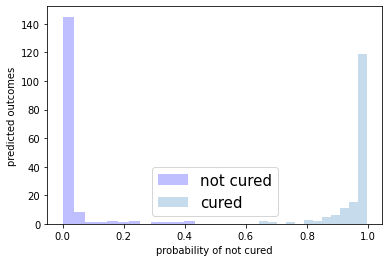

In [44]:
#We plot the predicted cured (not cured) labels on y-axis and 
#the probability of not being cured on the x-axis.


plt.xlabel('probability of not cured')
plt.ylabel('predicted outcomes')

plt.hist(notcured_probas, bins=12, label='not cured', color='blue', alpha=0.25)
plt.hist(cured_probas, bins=12, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()